# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

count_one = 0
set_one = 1


http://api.openweathermap.org/data/2.5/weather?appid=c440edd33f100e0cde207440aa46bcca&units=imperial&q=


In [20]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1


for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | port hedland
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | mataura
City not found. Skipping...
Processing Record 8 of Set 1 | nyagan
Processing Record 9 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 | abay
Processing Record 11 of Set 1 | cairns
Processing Record 12 of Set 1 | ibb
Processing Record 13 of Set 1 | batsfjord
Processing Record 14 of Set 1 | havoysund
Processing Record 15 of Set 1 | vavatenina
Processing Record 16 of Set 1 | aquiraz
Processing Record 17 of Set 1 | kankon
City not found. Skipping...
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | sisimiut
Processing Record 21 of Set 1 | wawa
Processing Record 22 of Set 1 | aykhal
Processing Record 23 of Set 1 | bluff

City not found. Skipping...
Processing Record 39 of Set 4 | grand gaube
Processing Record 40 of Set 4 | rocha
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | loreto
Processing Record 44 of Set 4 | nhulunbuy
Processing Record 45 of Set 4 | faizabad
Processing Record 46 of Set 4 | carsamba
Processing Record 47 of Set 4 | poya
Processing Record 48 of Set 4 | nantucket
Processing Record 49 of Set 4 | nagua
Processing Record 1 of Set 5 | moyo
Processing Record 2 of Set 5 | prainha
Processing Record 3 of Set 5 | atasu
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | beira
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | aden
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | camopi
Processing Record 11 of Set 5 | kaspiyskiy
Processing Record 12 of Set 5 | fort morgan
City not found. Skipping...
Processing Record 13 of

Processing Record 32 of Set 8 | hayvoron
City not found. Skipping...
Processing Record 33 of Set 8 | panama city
Processing Record 34 of Set 8 | axim
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | outram
Processing Record 37 of Set 8 | pemberton
City not found. Skipping...
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | formoso do araguaia
Processing Record 40 of Set 8 | barcarena
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | ninohe
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | biak
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | nanortalik
Processing Record 47 of Set 8 | khandyga
Processing Record 48 of Set 8 | spornoye
Processing Record 49 of Set 8 | beringovskiy
Processing Record 1 of Set 9 | at-bashi
Processing Record 2 of Set 9 | alta floresta
Processing Record 3 of Set 9 | burnie
Processing Record 4 of Set 9 | mwense
Processing Record 5 of Set 9 | campbel

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:

weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hasaki,75,JP,1586664820,67,35.73,140.83,57.20,11.41
1,tuktoyaktuk,20,CA,1586664700,77,69.45,-133.04,6.80,10.29
2,avera,1,US,1586664809,71,33.19,-82.53,60.80,5.82
3,port hedland,100,CD,1586664934,62,-7.03,29.76,72.21,7.34
4,esperance,100,AU,1586664935,16,-33.87,121.90,95.00,20.80
5,cherskiy,80,RU,1586664935,96,68.75,161.30,23.36,15.97
6,mataura,18,NZ,1586664935,53,-46.19,168.86,70.00,8.99
7,nyagan,100,RU,1586664936,90,62.14,65.39,36.99,3.78
8,punta arenas,36,PH,1586664936,52,8.99,125.34,85.66,3.24
9,abay,99,KZ,1586664937,43,49.63,72.85,51.80,22.37


In [22]:
weather_dataframe.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

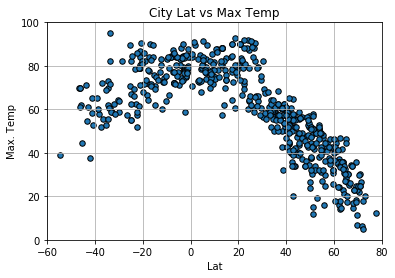

In [23]:

plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Lat vs Max Temp")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Lat")
plt.grid()


plt.savefig("Latitude VS Temperature.png")

#### Latitude vs. Humidity Plot

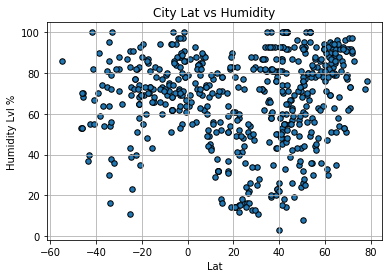

In [24]:

plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Lat vs Humidity")
plt.ylabel("Humidity Lvl %")
plt.xlabel("Lat")
plt.grid()


plt.savefig('lat VS hum.png')

#### Latitude vs. Cloudiness Plot

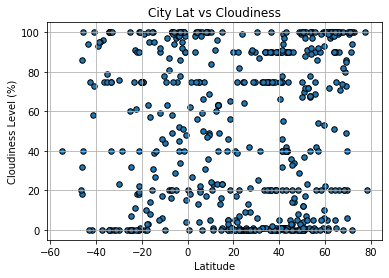

In [25]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Lat vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()


plt.savefig('lat VS cloud.png')

#### Latitude vs. Wind Speed Plot

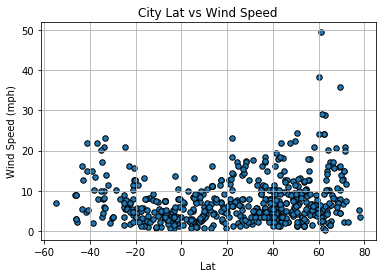

In [26]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Lat vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lat")
plt.grid()


plt.savefig('lat VS wind.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression